In [1]:
import helper
from helper import find_k_nearest_neighbors
from helper import waterkant_festival_description
from helper import Document
import json

In [2]:
import numpy as np

np_embeddings = np.load('prep/2024/earlyembeddings.npy')

In [3]:
np_embeddings.shape

(106, 1536)

In [5]:
from dotenv import load_dotenv

load_dotenv()  # This loads the environment variables from .env

True

In [7]:
import json
import uuid
with open('prep/2024/documents.json', 'r') as file:
            json_documents = json.load(file)

loaded_documents = [Document.from_json(json_str) for json_str in json_documents]

In [8]:
print(loaded_documents[1])

Content: Title: Neue Herausforderungen im Bereich von Open Source AI & LLM Security
Description: No description found
Date: Friday June 14, 2024 17:00 - 17:45 CEST
Location: Garden Tent
Type: 
Metadata: {'Speakers': ['Jake Petersen', 'Jan Monica'], 'date': {'day': 'Friday', 'start_time': '17:00', 'end_time': '17:45'}}


In [9]:
from openai import OpenAI
client = OpenAI()

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding



In [254]:
question="Ich interessiere mich für Veranstaltungen über Bildung"

In [255]:
question_embedding = get_embedding(question)

In [256]:
np_question_embedding = np.array(question_embedding)

In [257]:
k=len(np_embeddings)
indices, similarities = find_k_nearest_neighbors(np_embeddings, np_question_embedding, k)

In [258]:
indices

array([ 94,  79,  60,  50,  64,  48,  33,  28,  56,  25,  58,  24,  31,
        39,  76,   5,  75,  61,   7,  22, 103,  49,  99, 102,  26,  29,
        53, 100,  93,  83,   2,  45,  96,  81,  72,  78,   1,  62, 104,
        38,  30,  98,  84,   4,  14,  86,  73,  66,  88,   6,  68,   8,
        15,  23,  10,  69,  46,  34,  11,  47,  95,  85,  37,  71,  57,
        77,  55,  97,  59,   9,   0,  41,  20,  13,   3,  70,  35,  63,
        91,  40,  27,  87,  89,  42,  74,  92, 101,  65,  12,  67,  32,
       105,  19,  21,  36,  16,  43,  54,  18,  80,  17,  90,  51,  82,
        44,  52], dtype=int64)

In [259]:
similarities

array([ 0.44835086,  0.38075589,  0.35493017,  0.34523784,  0.32165112,
        0.31899236,  0.31749383,  0.31576491,  0.31429933,  0.31354836,
        0.3132538 ,  0.31281345,  0.31141482,  0.3108249 ,  0.31048432,
        0.30957435,  0.30732441,  0.30589233,  0.30588477,  0.30556525,
        0.3049805 ,  0.30066471,  0.29988174,  0.293275  ,  0.29214761,
        0.28961048,  0.28889315,  0.28525144,  0.28433741,  0.2835382 ,
        0.28198573,  0.2818712 ,  0.28185797,  0.28136326,  0.27827568,
        0.27739484,  0.27504272,  0.27504189,  0.27359368,  0.27208217,
        0.27008014,  0.26995197,  0.26968837,  0.26444004,  0.26357782,
        0.26287617,  0.26133773,  0.26093019,  0.26071899,  0.26044233,
        0.248857  ,  0.24667108,  0.24447085,  0.24145023,  0.23972088,
        0.23846933,  0.23843963,  0.23815755,  0.23201203,  0.22364342,
        0.22292554,  0.2216847 ,  0.21562585,  0.21308365,  0.21171695,
        0.20902315,  0.20613601,  0.19679844,  0.19622738,  0.18

In [260]:
for i, indice in enumerate(indices):
    print(loaded_documents[indice])
    print(f"Distance: {similarities[i]}\n\n")

Content: Title: Bildung der Zukunft und KI 🤖
Description: No description found
Date: Friday June 14, 2024 17:00 - 17:45 CEST
Location: Future Stage
Type: 
Metadata: {'Speakers': ['Doris Weßels', 'Gregor Schmalzried', 'Silke Hahn', 'Inken Paland'], 'date': {'day': 'Friday', 'start_time': '17:00', 'end_time': '17:45'}}
Distance: 0.44835086095809257


Content: Title: Extended Learning: Wissensvermittlung durch immersive Medien
Description: No description found
Date: Friday June 14, 2024 13:00 - 13:45 CEST
Location: Robotstage
Type: Extending Arts & Reality, panel
Metadata: {'Speakers': ['Prof. Dr. Rupert-Kruse', 'Sandra Schramke', 'Stefan Johnigk'], 'date': {'day': 'Friday', 'start_time': '13:00', 'end_time': '13:45'}}
Distance: 0.3807558916302943


Content: Title: Zukunftsdenken für den Mittelstand trainieren
Description: No description found
Date: Friday June 14, 2024 11:00 - 11:45 CEST
Location: Garden Tent
Type: Future Skills   Zukunft der Arbeit
Metadata: {'Speakers': ['Alice Rombach

In [261]:
import matplotlib.pyplot as plt

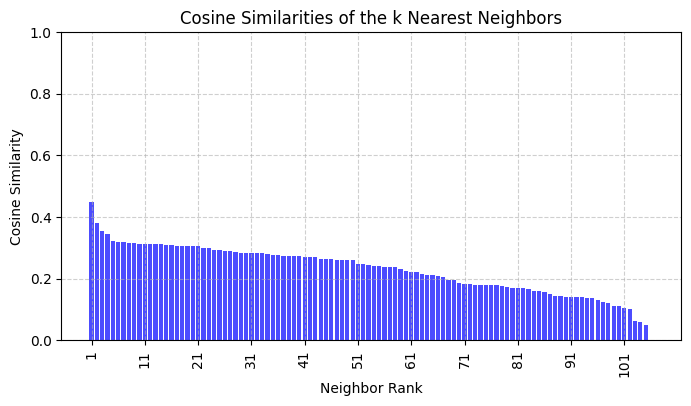

In [262]:
# Plotting the distances
plt.figure(figsize=(8, 4))
plt.bar(range(k), similarities, color='blue', alpha=0.7)
plt.title('Cosine Similarities of the k Nearest Neighbors')
plt.xlabel('Neighbor Rank')
plt.ylabel('Cosine Similarity')
plt.xticks(np.arange(0, k, step=10), [f"{i+1}" for i in range(0, k, 10)])  # Label every 10th point
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.ylim([0, 1])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [263]:
events = [loaded_documents[indice] for indice in indices[:10]]

In [264]:
events_str = ""
for event in events:
    events_str+= event.content.split('\n')[0] + "\n" + event.content.split('\n')[2] +"\n\n"

In [265]:
print(events_str)

Title: Bildung der Zukunft und KI 🤖
Date: Friday June 14, 2024 17:00 - 17:45 CEST

Title: Extended Learning: Wissensvermittlung durch immersive Medien
Date: Friday June 14, 2024 13:00 - 13:45 CEST

Title: Zukunftsdenken für den Mittelstand trainieren
Date: Friday June 14, 2024 11:00 - 11:45 CEST

Title: eGov Meetup
Date: Friday June 14, 2024 16:00 - 16:45 CEST

Title: Content Creation mit KI
Date: Friday June 14, 2024 13:00 - 13:45 CEST

Title: Pitch Competition Startup Camp Schleswig-Holstein by Plug + Play
Date: Thursday June 13, 2024 18:00 - 19:00 CEST

Title: Future of Education
Date: Friday June 14, 2024 10:00 - 10:45 CEST

Title: Masterclass // Engagement Marketing: Wie Unternehmen die nächste Generation Käufer:innen gezielt ansprechen
  Get your masterclass ticket here: https://waterkant24.eventbrite.deHole Dir hier Dein Masterclassticket: https://waterkant24.eventbrite.de

Title: Zukunft des Journalismus
Date: Friday June 14, 2024 14:00 - 14:45 CEST

Title: Masterclass // Verha

In [226]:
def replace_placeholders(template, replacements):
    for key, value in replacements.items():
        placeholder = "%" + key + "%"
        template = template.replace(placeholder, value)
    return template

In [227]:
system_prompt =waterkant_festival_description+ "You are a helpful chatbot for the attendees of the Waterkant Festival! You answer questions about events, schedules, venue information, transportation options, or anything else. The attendees should feel free to ask you. You respond in the same language the user asks the question and use fitting emojis!"

In [228]:
template="Here is a list of events which could be helpful to answer the question:\n\n%events%\n\nPlease provide an answer to the question based on the preceding information. Include all events that directly relate to the topic of the question. If a specific time, such as 'Friday morning,' is mentioned, prioritize these events in your response before others. Additionally, mention any events that, while not directly related to the specified time, could still be relevant and interesting. Exclude any events that do not pertain to the topic. Ensure that your response is in the same language as the question. If necessary, translate the titles of the events into the language of the question and use fitting emojis.\nHere is the question:\n%question%"

In [229]:
replacements= {"question": question, "events": events_str}

In [230]:
prompt= replace_placeholders(template, replacements)

In [231]:
prompt

"Here is a list of events which could be helpful to answer the question:\n\nTitle: Bildung der Zukunft und KI 🤖\nDate: Friday June 14, 2024 17:00 - 17:45 CEST\n\nTitle: Extended Learning: Wissensvermittlung durch immersive Medien\nDate: Friday June 14, 2024 13:00 - 13:45 CEST\n\nTitle: Zukunftsdenken für den Mittelstand trainieren\nDate: Friday June 14, 2024 11:00 - 11:45 CEST\n\nTitle: Abschlusspräsentation Digitalhub.sh\nDate: Friday June 14, 2024 12:00 - 12:30 CEST\n\nTitle: eGov Meetup\nDate: Friday June 14, 2024 16:00 - 16:45 CEST\n\nTitle: Die Zukünfte des Internets sind feministisch\nDate: Friday June 14, 2024 13:00 - 13:45 CEST\n\nTitle: Masterclass // Futures Snack: Praktische Einführung in Futures Thinking\n  Get your masterclass ticket here: https://waterkant24.eventbrite.deHole Dir hier Dein Masterclassticket: https://waterkant24.eventbrite.de\n\nTitle: Organisationsmodelle der Zukunft (Alles Holo oder was?)\nDate: Friday June 14, 2024 14:00 - 14:45 CEST\n\nTitle: Die Zukün

In [232]:
len(prompt) + len(system_prompt)

3893

In [233]:
from openai import OpenAI
client = OpenAI()
messages=[
        {"role": "system", "content": system_prompt},
      ]
messages+= [{"role": "user", "content": prompt}]
completion = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=messages,
    temperature=0.0
)

print(completion.choices[0].message.content)

Hallo! Am Freitag vor 14 Uhr gibt es einige spannende Veranstaltungen zum Thema digitale Bildung beim Waterkant Festival 🎓📚:

1. **Zukunftsdenken für den Mittelstand trainieren** - Freitag, 14. Juni 2024, 11:00 - 11:45 Uhr CEST
   Hier könnten innovative Ansätze zur Bildung im Mittelstand diskutiert werden, die auch digitale Aspekte beinhalten könnten.

2. **Abschlusspräsentation Digitalhub.sh** - Freitag, 14. Juni 2024, 12:00 - 12:30 Uhr CEST
   Diese Präsentation konzentriert sich direkt auf digitale Themen und könnte interessante Einblicke in neue digitale Bildungstools oder -methoden bieten.

3. **Extended Learning: Wissensvermittlung durch immersive Medien** - Freitag, 14. Juni 2024, 13:00 - 13:45 Uhr CEST
   Diese Veranstaltung behandelt die Nutzung von immersiven Medien in der Bildung, was ein sehr relevantes Thema im Bereich der digitalen Bildung ist.

Diese Veranstaltungen sollten Ihnen einen guten Überblick über die aktuellen Trends und Entwicklungen im Bereich der digitalen 

In [234]:
completion.usage.prompt_tokens * 10 / 1000000 + completion.usage.completion_tokens * 30 / 1000000

0.01805